In [34]:
import pandas as pd
import numpy as np

import pylab as plt # para "pintar"
import seaborn as sns

In [4]:
carfuel = pd.read_excel('data/measurements2.xlsx')

In [11]:
carfuel.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [6]:
carfuel.tail()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN
387,14.7,5.0,25,25.0,30,AC,SP98,1,0,0,NaN,NaN


In [7]:
carfuel.shape

(388, 12)

In [8]:
carfuel.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 77.6 KB


In [9]:
carfuel.specials.value_counts() # Tenemos muy pocos datos y no hay uniformidad; además tenemos el get_dummies con AC, sun y
# rain, así que decidimos eliminar esta columna.

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [31]:
carfuel.drop(columns=['specials'], inplace=True)

In [18]:
carfuel['refill liters'].value_counts() # Tenemos muchos registros nulos, vamos a eliminar esta columna.

45.0    2
37.7    2
39.0    2
37.6    1
38.0    1
38.3    1
10.0    1
41.0    1
37.0    1
37.2    1
Name: refill liters, dtype: int64

In [19]:
carfuel['refill gas'].value_counts() # Tenemos muchos registros nulos, también vamos a eliminar esta columna.

SP98    8
E10     5
Name: refill gas, dtype: int64

In [21]:
carfuel.drop(columns=['refill liters', 'refill gas'], inplace=True)

In [32]:
carfuel.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [33]:
carfuel.info() # Nos queda únicamente una columna con nulos: temp_inside.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


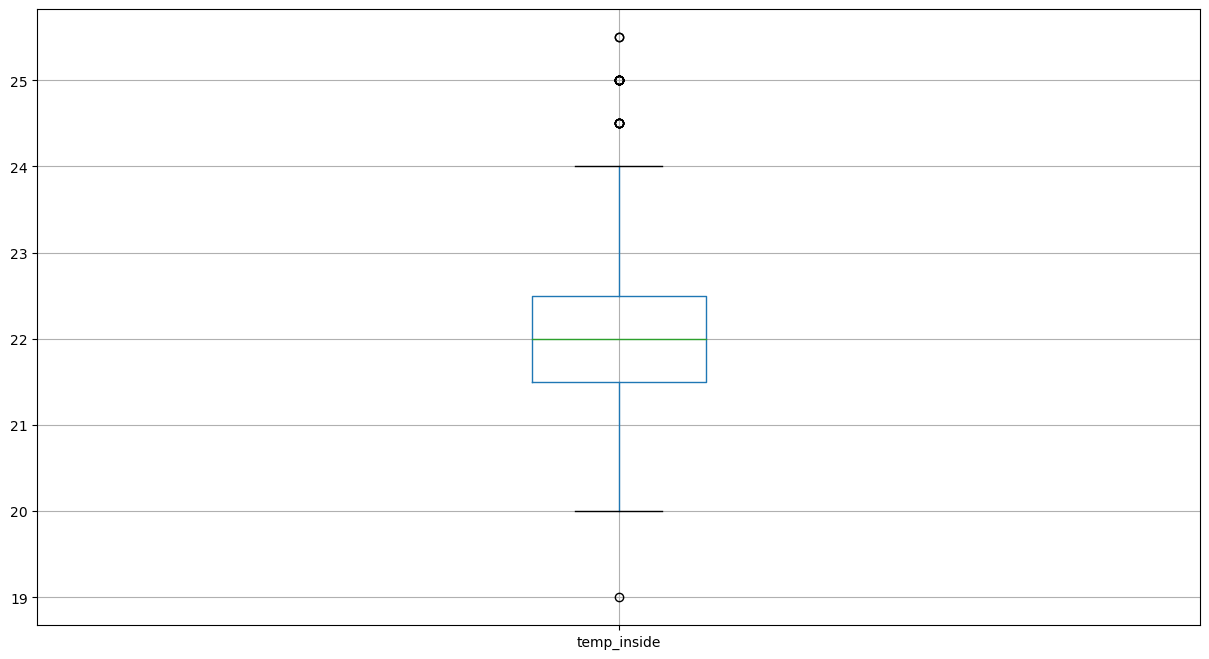

In [40]:
carfuel[['temp_inside']].boxplot(figsize=(15, 8)); # Vemos una distribución bastante ordenada, con pocos elementos que
# pudieran ser outliers, pero que realmente no lo son; decidimos no eliminar estos elementos que sobrepasan el IQR (bien
# por arriba o por abajo)


In [44]:
print(carfuel.temp_inside.min())
print(carfuel.temp_inside.max())
print(carfuel.temp_inside.median()) # Vamos a rellenar los nulos con la mediana.

19.0
25.5
22.0


In [45]:
median = carfuel.temp_inside.median()

In [46]:
carfuel['temp_inside'] = carfuel['temp_inside'].fillna(median)

carfuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


In [49]:
carfuel.gas_type.value_counts() # Para terminar de limpiar y homogeneizar el dataset, vamos a codificar la columna
# "gas_type", ya que son dos valores lo que tiene y para saber posteriormente que relación tiene con el consumo, conviene
# transformar el dato a numérico. Vamos a clasificar SP98 como 0 y E10 como 1.

SP98    228
E10     160
Name: gas_type, dtype: int64

In [50]:
carfuel['gas_type'] = carfuel['gas_type'].str.replace('SP98', '0')
carfuel['gas_type'] = carfuel['gas_type'].str.replace('E10', '1')

In [54]:
carfuel['gas_type'] = carfuel['gas_type'].astype(int)

In [55]:
carfuel.info() # Ahora que ya tenemos todo limpio, sin nulos y con el d_type adecuado (todo numérico), vamos a ver las
# posibles relaciones entre el consumo (nuestra variable objetivo) con el resto de variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    int32  
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int32(1), int64(5)
memory usage: 25.9 KB


In [53]:
carfuel.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,1,0,0,0
1,12.0,4.2,30,21.5,13,1,0,0,0
2,11.2,5.5,38,21.5,15,1,0,0,0
3,12.9,3.9,36,21.5,14,1,0,0,0
4,18.5,4.5,46,21.5,15,1,0,0,0


In [58]:
corr = carfuel.corr() # Vamos a ver la matriz de correlaciones mejor gráficamente

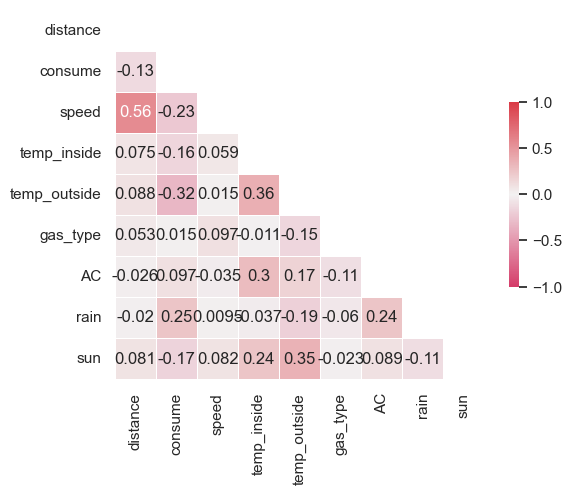

In [59]:
# your code here
sns.set(style='white')                            # estilo blanco

mascara=np.triu(np.ones_like(corr, dtype=bool))   # genera una mascara

cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores


sns.heatmap(corr,             # datos
            mask=mascara,     # mascara
            cmap=cmap,        # color
            vmax=1,           # maximo vertical
            vmin=-1,          # minimo vertical
            center=0,         # centro
            square=True,      # cuadrado el dato pintado
            linewidth=0.5,    # ancho de la linea
            
            cbar_kws={'shrink': 0.5},  # barra de color
            annot=True                 # anotacion, el numero escrito
           );

In [60]:
# Podemos decir con respecto a nuestra variable objetivo que hay una correlación débil con speed (negativa), temp_inside 
# (negativa), rain (positiva), sun (negativa) y una correlación moderada con temp_outside (negativa).
# Parece que le tipo de gas en principio no tiene relación con el consumo, sino que son otros factores los que habría que
# tener en cuenta.
# Vemos también que no hay colinealidad entre las variables que no son el target, por lo que no eliminaremos más columnas.

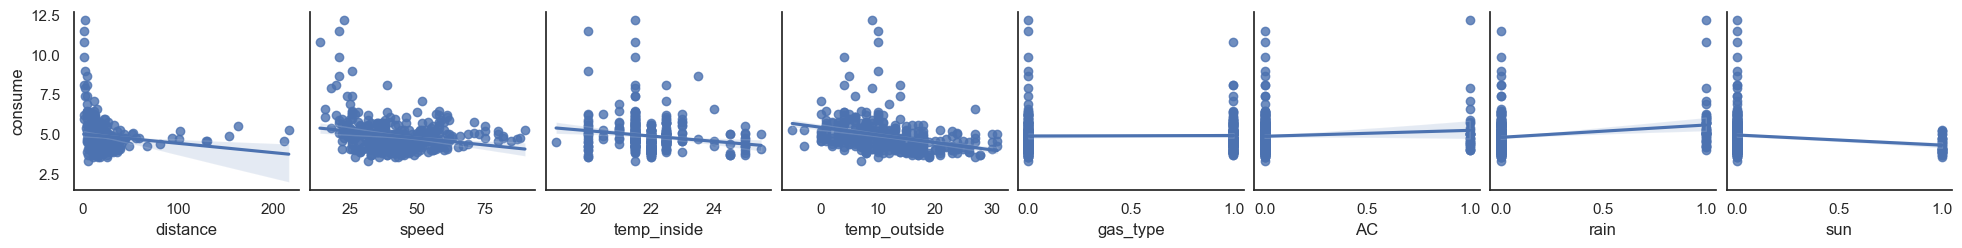

In [61]:
# Crear un scatter plot y línea de regresión para cada variable
sns.pairplot(carfuel, x_vars=['distance', 'speed', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun'], y_vars=['consume'], kind="reg")

# Mostrar el gráfico
plt.show()

In [ ]:
# Vemos, efectivamente, que la única variable con una relación más o menos fuerte con el consumo es temp_outside, no así
# gas_type.